In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [ ]:
# Read data
data_hr = pd.read_csv("HR_Analytics.csv")

In [ ]:
# Set pandas max columns jumlah kolom dari data
pd.set_option('display.max_columns', len(data_hr.columns))
pd.set_option('display.max_rows', 110)

# Menampilkan 5 data teratas
data_hr.head(5)

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0.0


In [ ]:
# dimensi dataset
row, columns = data_hr.shape

print(f"Data HR terdiri atas {row} baris dan {columns} kolom")

Data HR terdiri atas 1480 baris dan 38 kolom


In [ ]:
# Menampilkan info setiap kolom
data_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [ ]:
# Meakukan pengecekan jumlah unique pada semua kolom
print("Pengecekan jumlah unique pada semua kolom")
print("-----------------------------------------------")
print(data_hr.nunique())

Pengecekan jumlah unique pada semua kolom
-----------------------------------------------
EmpID                       1470
Age                           43
AgeGroup                       5
Attrition                      2
BusinessTravel                 4
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
SalarySlab                     4
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating  

## Data Processing dan Cleaning

1. Memilih data yang relevan

Tidak semua data digunakan. Berdasrkan *objective* yang akan dianalisis, kolom yang akan digunakan adalah :
- EmpID : The number ID of employee (Object)
- Age : The age of the employee (Numerical)
- AgeGroup : Whether or not the employee has left the organization (Categorical)
- Attrition : Whether or not the employee has left the organization (Categorical)
- Department : The department the employee works in (Categorical)
- Education : The level of education achieved by the employee (Categorical)
- EducationField : The field of study for the employee's education (Categorical)
- EnvironmentSatisfaction : The employee's satisfaction with their work environment (Categorical)
- Gender : The gender of the employee (Categorical)
- JobInvolvement : The level of involvement required for the employee's job (Categorical)
- JobLevel : The job level of the employee (Categorical)
- JobRole : The role of the employee in the organization (Categorical)
- JobSatisfaction : The employee's satisfaction with their job (Categorical)
- MaritalStatus : The marital status of the employee (Categorical)
- MonthlyIncome : The monthly income of the employee (Numerical)
- SalarySlab : Range of salary levels within an organization or a profession (Categorical)
- OverTime : Whether or not the employee works overtime. (Categorical)
- PerformanceRating : The performance rating of the employee. (Categorical)
- RelationshipSatisfaction : The employee's satisfaction with their relationships. (Categorical)
- YearsSinceLastPromotion : The number of years since the employee's last promotion. (Numerical)

In [ ]:
# Daftar kolom yang akan di drop
drop_columns = ["BusinessTravel", "DailyRate", "DistanceFromHome", "HourlyRate", "MonthlyRate", "NumCompaniesWorked", "Over18", "PercentSalaryHike", "StandardHours", "StockOptionLevel",
'TotalWorkingYears', "YearsInCurrentRole", "YearsWithCurrManager", "EmployeeNumber", "EmployeeCount"]

# Memfilter data
data_hr_filtered = data_hr.drop(drop_columns, axis=1)

# Menampilkan dimensi dataframe
data_hr_filtered.head()

,EmpID,Age,AgeGroup,Attrition,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,OverTime,PerformanceRating,RelationshipSatisfaction,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,RM297,18,18-25,Yes,Research & Development,3,Life Sciences,3,Male,3,1,Laboratory Technician,3,Single,1420,Upto 5k,No,3,3,2,3,0,0
1,RM302,18,18-25,No,Sales,3,Medical,4,Female,2,1,Sales Representative,3,Single,1200,Upto 5k,No,3,1,2,3,0,0
2,RM458,18,18-25,Yes,Sales,3,Marketing,2,Male,3,1,Sales Representative,2,Single,1878,Upto 5k,Yes,3,4,3,3,0,0
3,RM728,18,18-25,No,Research & Development,2,Life Sciences,2,Male,3,1,Research Scientist,4,Single,1051,Upto 5k,No,3,4,2,3,0,0
4,RM829,18,18-25,Yes,Research & Development,1,Medical,3,Male,3,1,Laboratory Technician,3,Single,1904,Upto 5k,No,3,4,0,3,0,0


In [ ]:
# Info dataset
data_hr_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmpID                     1480 non-null   object
 1   Age                       1480 non-null   int64 
 2   AgeGroup                  1480 non-null   object
 3   Attrition                 1480 non-null   object
 4   Department                1480 non-null   object
 5   Education                 1480 non-null   int64 
 6   EducationField            1480 non-null   object
 7   EnvironmentSatisfaction   1480 non-null   int64 
 8   Gender                    1480 non-null   object
 9   JobInvolvement            1480 non-null   int64 
 10  JobLevel                  1480 non-null   int64 
 11  JobRole                   1480 non-null   object
 12  JobSatisfaction           1480 non-null   int64 
 13  MaritalStatus             1480 non-null   object
 14  MonthlyIncome           

In [ ]:
# Dimensi dataset
row, columns = data_hr_filtered.shape

print(f"Data HR setelah difilter terdiri atas {row} baris dan {columns} kolom")

Data HR setelah difilter terdiri atas 1480 baris dan 23 kolom


In [ ]:
# Melakukan pengecekan jumlah unique pada semua kolom
print("Pengecekan jumlah unique pada semua kolom")
print("-----------------------------------------------")
print(data_hr_filtered.nunique())

Pengecekan jumlah unique pada semua kolom
-----------------------------------------------
EmpID                       1470
Age                           43
AgeGroup                       5
Attrition                      2
Department                     3
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
SalarySlab                     4
OverTime                       2
PerformanceRating              2
RelationshipSatisfaction       4
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsSinceLastPromotion       16
dtype: int64


Dari informasi diatas semua kolom sudah sesuai antara representasi dan tipe data dari kolom tersebut.

2. Feature engineering : Mengembangkan fitur dengan menambahkan kolom `NumAttrition`, di mana nilai 0 mewakili 'No' dan nilai 1 mewakili 'Yes'

In [ ]:
# Membuat copy dataset
data_hr_copy = copy.deepcopy(data_hr_filtered)

# Membuat label
Attr_mapper = {"No": 0,
               "Yes": 1}

# Membuat label kolom baru 'NumAttrition' dengan nilai 0 dan 1 menggunakan mapper
data_hr_copy['NumAttrition'] = data_hr_copy['Attrition'].map(Attr_mapper)

# Menampilkan bentuk dataframe yang telah digabungkan
data_hr_copy.head()


,EmpID,Age,AgeGroup,Attrition,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,OverTime,PerformanceRating,RelationshipSatisfaction,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,NumAttrition
0,RM297,18,18-25,Yes,Research & Development,3,Life Sciences,3,Male,3,1,Laboratory Technician,3,Single,1420,Upto 5k,No,3,3,2,3,0,0,1
1,RM302,18,18-25,No,Sales,3,Medical,4,Female,2,1,Sales Representative,3,Single,1200,Upto 5k,No,3,1,2,3,0,0,0
2,RM458,18,18-25,Yes,Sales,3,Marketing,2,Male,3,1,Sales Representative,2,Single,1878,Upto 5k,Yes,3,4,3,3,0,0,1
3,RM728,18,18-25,No,Research & Development,2,Life Sciences,2,Male,3,1,Research Scientist,4,Single,1051,Upto 5k,No,3,4,2,3,0,0,0
4,RM829,18,18-25,Yes,Research & Development,1,Medical,3,Male,3,1,Laboratory Technician,3,Single,1904,Upto 5k,No,3,4,0,3,0,0,1


In [ ]:
# Dimensi dataset
row, columns = data_hr_copy.shape

print(f"Data HR setelah ditambahkan kolom `NumAttrition` terdiri atas {row} baris dan {columns} kolom")

Data HR setelah ditambahkan kolom `NumAttrition` terdiri atas 1480 baris dan 24 kolom


3. Mengecek dan menghandle data duplikat

In [ ]:
# Menghtung jumlah data duplikat
data_duplicate = data_hr_copy.duplicated().sum()

print(f"Jumlah data duplikat : {data_duplicate}")
print("--------------------------------------")
print("Identifikasi data duplikat")

# identifikasi data duplikat
duplicate_rows = data_hr_copy[data_hr_copy.duplicated(keep=False)].head(25)

# Menampilkan baris duplikat
duplicate_rows


Jumlah data duplikat : 10
--------------------------------------
Identifikasi data duplikat


,EmpID,Age,AgeGroup,Attrition,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,OverTime,PerformanceRating,RelationshipSatisfaction,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,NumAttrition
161,RM1465,26,26-35,No,Sales,3,Other,4,Female,2,1,Sales Representative,3,Single,2966,Upto 5k,No,3,4,2,3,4,0,0
162,RM1465,26,26-35,No,Sales,3,Other,4,Female,2,1,Sales Representative,3,Single,2966,Upto 5k,No,3,4,2,3,4,0,0
210,RM1468,27,26-35,No,Research & Development,3,Life Sciences,2,Male,4,2,Manufacturing Director,2,Married,6142,5k-10k,Yes,4,2,0,3,6,0,0
211,RM1468,27,26-35,No,Research & Development,3,Life Sciences,2,Male,4,2,Manufacturing Director,2,Married,6142,5k-10k,Yes,4,2,0,3,6,0,0
327,RM1461,29,26-35,No,Research & Development,4,Medical,4,Female,2,1,Research Scientist,1,Single,3785,Upto 5k,No,3,2,3,1,5,0,0
328,RM1461,29,26-35,No,Research & Development,4,Medical,4,Female,2,1,Research Scientist,1,Single,3785,Upto 5k,No,3,2,3,1,5,0,0
457,RM1464,31,26-35,No,Research & Development,3,Medical,2,Male,3,2,Manufacturing Director,1,Single,9936,5k-10k,No,3,2,2,3,9,1,0
458,RM1464,31,26-35,No,Research & Development,3,Medical,2,Male,3,2,Manufacturing Director,1,Single,9936,5k-10k,No,3,2,2,3,9,1,0
654,RM1470,34,26-35,No,Research & Development,3,Medical,2,Male,4,2,Laboratory Technician,3,Married,4404,Upto 5k,No,3,1,3,4,4,1,0
655,RM1470,34,26-35,No,Research & Development,3,Medical,2,Male,4,2,Laboratory Technician,3,Married,4404,Upto 5k,No,3,1,3,4,4,1,0


Dari informasi diatas, jumlah baris yang mengalami duplikat adalah 10

In [ ]:
# Menghandle data duplikat
# Menghapus data duplikat dari kolom
drop_duplicate = data_hr_copy.drop_duplicates(keep='first',inplace=True, ignore_index=True)

# Menghtung jumlah data duplikat setelah dibersihkan
data_duplicate_2 = data_hr_copy.duplicated().sum()

print(f"Jumlah data duplikat : {data_duplicate_2}")
print("--------------------------------------")
print("Identifikasi data duplikat")

# identifikasi data duplikat
duplicate_rows_2 = data_hr_copy[data_hr_copy.duplicated(keep=False)].head(25)

# Menampilkan baris duplikat
duplicate_rows_2

Jumlah data duplikat : 0
--------------------------------------
Identifikasi data duplikat


,EmpID,Age,AgeGroup,Attrition,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,OverTime,PerformanceRating,RelationshipSatisfaction,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,NumAttrition


Dari informasi diatas, jumlah baris yang mengalami duplikat sudah tidak ada

3. Mengecek dan menghandle data missing value

In [ ]:
# Mengecek presentase missing value
data_missing = (data_hr_copy.isnull().sum() /len(data_hr_copy) *100).sort_values(ascending=False)

# Menampilkan data
data_missing

EmpID                       0.0
Age                         0.0
YearsSinceLastPromotion     0.0
YearsAtCompany              0.0
WorkLifeBalance             0.0
TrainingTimesLastYear       0.0
RelationshipSatisfaction    0.0
PerformanceRating           0.0
OverTime                    0.0
SalarySlab                  0.0
MonthlyIncome               0.0
MaritalStatus               0.0
JobSatisfaction             0.0
JobRole                     0.0
JobLevel                    0.0
JobInvolvement              0.0
Gender                      0.0
EnvironmentSatisfaction     0.0
EducationField              0.0
Education                   0.0
Department                  0.0
Attrition                   0.0
AgeGroup                    0.0
NumAttrition                0.0
dtype: float64

Dari informasi diatas bebarapa kolom sudah tidak terdapat missing value.

4. Mengecek dan menghandle outlier

In [ ]:
# Memisahkan kolom berdasarkan tipe data
hr_numeric_columns = data_hr_copy.select_dtypes(include=['float64', 'int64'])
hr_categoric_columns = data_hr_copy.select_dtypes(include='object')

# Menampilkan nama kolom bertipe numerik
print("Data Kolom Numerik:")
print(hr_numeric_columns.columns)

print("\n")

# Menampilkan nama kolom bertipe kategorik
print("Data Kolom Kategori:")
print(hr_categoric_columns.columns)

Data Kolom Numerik:
Index(['Age', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'PerformanceRating',
       'RelationshipSatisfaction', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'NumAttrition'],
      dtype='object')


Data Kolom Kategori:
Index(['EmpID', 'AgeGroup', 'Attrition', 'Department', 'EducationField',
       'Gender', 'JobRole', 'MaritalStatus', 'SalarySlab', 'OverTime'],
      dtype='object')


Data pada kolom bertipe numerik, terdapat beberapa yang nilainya berupa ordinal atau tingkatan yang berurutan yaitu `Education`, `EnvironmentSatisfaction`, `JobInvolvement`, `JobLevel`, `JobSatisfaction', 'PerformanceRating`, `RelationshipSatisfaction`, `TrainingTimesLastYear`, `WorkLifeBalance`, `YearsSinceLastPromotion`, sehingga kolom yang akan di cek outliernya adalah `Age`, `MonthlyIncome`, dan `YearsAtCompany`

In [ ]:
# Menampilkan statistik deskriptif dari data bertipe numerik
hr_numeric_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.0,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
PerformanceRating,1470.0,3.153741,0.360824,3.0,3.0,3.0,3.0,4.0
RelationshipSatisfaction,1470.0,2.712245,1.081209,1.0,2.0,3.0,4.0,4.0
TrainingTimesLastYear,1470.0,2.799320,1.289271,0.0,2.0,3.0,3.0,6.0


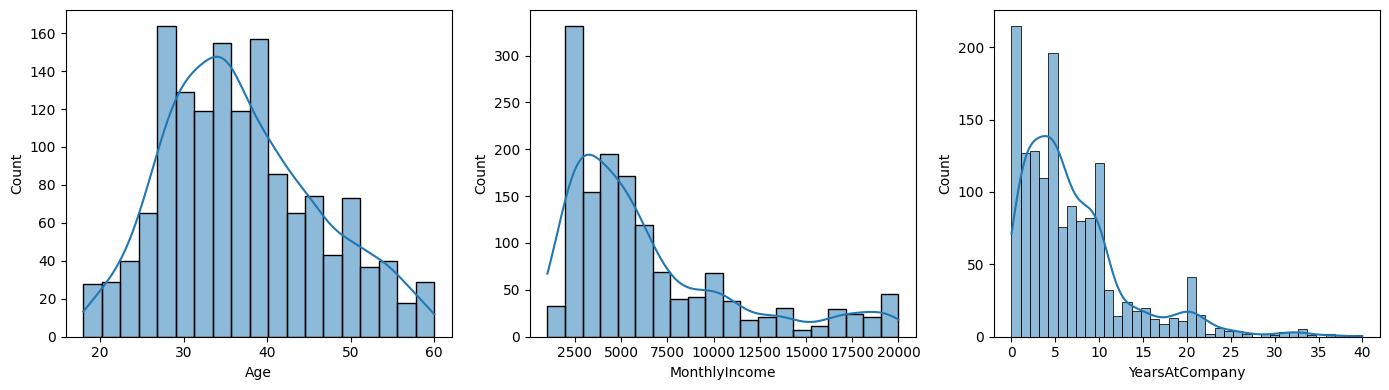

In [ ]:
# Mengecek distribusi kolom numerik
# Kolom yang akan dicek outliernya menggunakan boxplot
distribution_columns = ["Age", "MonthlyIncome", "YearsAtCompany"]

# Membuat subplots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))

# Perulangan untuk membuat boxplot untuk kolom numerik
for i, col in enumerate(distribution_columns):

    # Menghitung nomor baris untuk subplot berdasarkan indeks iterasi i
    # jika i = 0 baris akan menjadi 0, jika i = 1 baris akan menjadi 1
    # jika i = 2 baris akan menjadi 2
    duplicate_rows_subplot = i // 1

    # Menghitung nomor kolom untuk subplot berdasarkan indeks iterasi i
    # jika i adalah 0,1,2, kolom_subplot akan menjadi 0
    columns_subplot = i % 3

    # Membuat boxplot
    sns.histplot(data=data_hr_copy, x=col, kde=True, ax=ax[columns_subplot])

plt.tight_layout()
plt.show()

Berdasarkan visualisi distribusi diatas, kolom `Age` mememiliki data yang berdistribusi normal, sedangkan kolom `MonthlyIncome` dan `YearsAtCompany`memiliki data yang berdistribusi tidak normal atau skew positif.

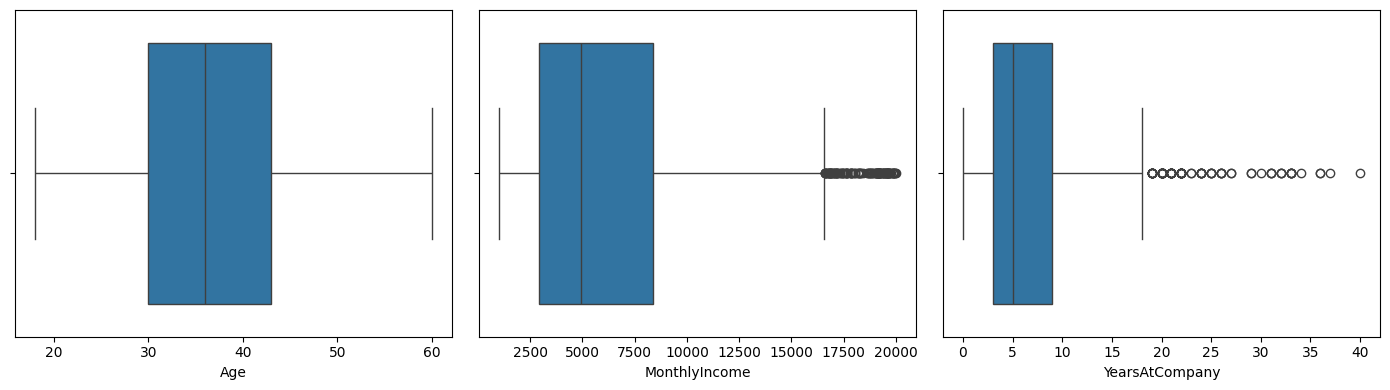

In [ ]:
# Mengecek outlier kolom numerik
# Kolom yang akan dicek outliernya menggunakan boxplot
check_column_outlier = ["Age", "MonthlyIncome", "YearsAtCompany"]

# Membuat subplots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))

# Perulangan untuk membuat boxplot untuk kolom numerik
for i, col in enumerate(check_column_outlier):

    # Menghitung nomor baris untuk subplot berdasarkan indeks iterasi i
    # jika i = 0 baris akan menjadi 0, jika i = 1 baris akan menjadi 1
    # jika i = 2 baris akan menjadi 2
    rows_subplot = i // 1

    # Menghitung nomor kolom untuk subplot berdasarkan indeks iterasi i
    # jika i adalah 0,1,2, kolom_subplot akan menjadi 0
    columns_subplot = i % 3

    # Membuat boxplot
    sns.boxplot(data=data_hr_copy, x=col, ax=ax[columns_subplot])

plt.tight_layout()
plt.show()


Dari visualisasi boxplot diatas, kolom yang memiliki outlier adalah `MonthlyIncome` dan`YearsAtCompany` yang berada diatas batas atas atau max bound.



In [ ]:
# Mengidentifikasi deskripsi statistik kolom tipe numerik
column_outlier = ["Age", "MonthlyIncome", "YearsAtCompany"]

# Perulangan untuk setiap kolom bertipe numerik yang akan dicek outliernya
for col in column_outlier:

  # Menampilkan statistik deskriptif dari data
  data_describe = data_hr_copy[col].describe()
  print(f"Deskripsi statistik pada kolom {col} sebelum outlier dibersihkan")
  print(data_describe)
  print("--------------------------------------")

Deskripsi statistik pada kolom Age sebelum outlier dibersihkan
count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64
--------------------------------------
Deskripsi statistik pada kolom MonthlyIncome sebelum outlier dibersihkan
count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64
--------------------------------------
Deskripsi statistik pada kolom YearsAtCompany sebelum outlier dibersihkan
count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64
--------------------------------------


In [ ]:
# Kolom yang akan difilter outliernya
column_filter_outlier = ["MonthlyIncome", "YearsAtCompany"]

# Perulangan untuk setiap kolom yang akan difilter
for col in column_filter_outlier:

    # Hitung batas atas
    max_bound = data_hr_copy[col].quantile(q=0.75) * 1.5

    # Mengunakan batas atas untuk memfilter DataFrame
    data_hr_clean = data_hr_copy[data_hr_copy[col] < max_bound]

    # Outlier pada DataFrame
    detect_outlier =  data_hr_copy[data_hr_copy[col] >= max_bound]

    print(f"Jumlah outlier sebelum dihapus pada kolom {col} adalah {len(detect_outlier)}")
    print("------------------------------------------------------------------")

# Tampilkan lima baris pertama DataFrame hasil filtering outlier
data_hr_clean

Jumlah outlier sebelum dihapus pada kolom MonthlyIncome adalah 189
------------------------------------------------------------------
Jumlah outlier sebelum dihapus pada kolom YearsAtCompany adalah 176
------------------------------------------------------------------


,EmpID,Age,AgeGroup,Attrition,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,OverTime,PerformanceRating,RelationshipSatisfaction,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,NumAttrition
0,RM297,18,18-25,Yes,Research & Development,3,Life Sciences,3,Male,3,1,Laboratory Technician,3,Single,1420,Upto 5k,No,3,3,2,3,0,0,1
1,RM302,18,18-25,No,Sales,3,Medical,4,Female,2,1,Sales Representative,3,Single,1200,Upto 5k,No,3,1,2,3,0,0,0
2,RM458,18,18-25,Yes,Sales,3,Marketing,2,Male,3,1,Sales Representative,2,Single,1878,Upto 5k,Yes,3,4,3,3,0,0,1
3,RM728,18,18-25,No,Research & Development,2,Life Sciences,2,Male,3,1,Research Scientist,4,Single,1051,Upto 5k,No,3,4,2,3,0,0,0
4,RM829,18,18-25,Yes,Research & Development,1,Medical,3,Male,3,1,Laboratory Technician,3,Single,1904,Upto 5k,No,3,4,0,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,RM898,59,55+,No,Sales,3,Life Sciences,3,Female,2,2,Sales Executive,4,Single,5171,5k-10k,No,3,4,2,3,6,0,0
1464,RM920,59,55+,No,Research & Development,4,Medical,4,Male,3,3,Manufacturing Director,4,Single,10512,10k-15k,No,3,4,6,2,9,5,0
1467,RM537,60,55+,No,Sales,4,Marketing,1,Male,3,2,Sales Executive,1,Single,5405,5k-10k,No,3,4,1,3,2,2,0
1468,RM880,60,55+,No,Sales,4,Marketing,2,Male,4,2,Sales Executive,4,Divorced,5220,5k-10k,Yes,3,2,3,3,11,1,0


In [ ]:
# Mengidentifikasi deskripsi statistik kolom yang outliernya telah dihilangkan
column_outlier = ["MonthlyIncome", "YearsAtCompany"]

# Perulangan untuk setiap kolom yang outliernya telah dihapus
for col in column_outlier:

  # Menampilkan statistik deskriptif dari data
  data_decsribe = data_hr_clean[col].describe()
  print(f"decsribe kolom {col} tanpa outlier")
  print(data_decsribe)
  print("--------------------------------------")

decsribe kolom MonthlyIncome tanpa outlier
count     1294.000000
mean      5719.422720
std       3991.649105
min       1009.000000
25%       2791.500000
50%       4563.500000
75%       6809.250000
max      19943.000000
Name: MonthlyIncome, dtype: float64
--------------------------------------
decsribe kolom YearsAtCompany tanpa outlier
count    1294.000000
mean        5.197063
std         3.336358
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        13.000000
Name: YearsAtCompany, dtype: float64
--------------------------------------


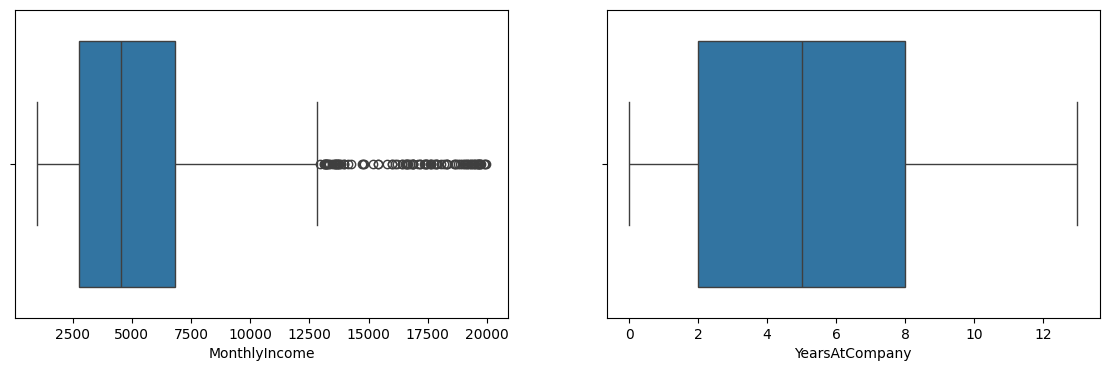

In [ ]:
# Kolom yang akan dicek outliernya menggunakan boxplot
column_whitout_outlier = ["MonthlyIncome", "YearsAtCompany"]

# Membuat subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# Perulangan untuk membuat boxplot untuk kolom numerik
for i, col in enumerate(column_whitout_outlier):

    # Menghitung nomor kolom untuk subplot berdasarkan indeks iterasi i
    column_subplot = i

    # Membuat boxplot
    sns.boxplot(data=data_hr_clean, x=col, ax=ax[column_subplot])

plt.show()

In [ ]:
# Kolom yang sudah difilter outliernya
column_filter_outlier = ["MonthlyIncome", "YearsAtCompany"]

# Perulangan untuk setiap kolom yang sudah difilter
for col in column_filter_outlier:

    # Hitung batas atas
    max_bound = data_hr_clean[col].quantile(q=0.75) * 1.5

    # Outlier pada DataFrame
    detect_outlier =  data_hr_clean[data_hr_copy[col] >= max_bound]

    print(f"Jumlah outlier setelah dihapus pada kolom {col} adalah {len(detect_outlier)}")
    print("------------------------------------------------------------------")

Jumlah outlier setelah dihapus pada kolom MonthlyIncome adalah 158
------------------------------------------------------------------
Jumlah outlier setelah dihapus pada kolom YearsAtCompany adalah 38
------------------------------------------------------------------


<ipython-input-24-2c3d307ee57f>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  detect_outlier =  data_hr_clean[data_hr_copy[col] >= max_bound]
<ipython-input-24-2c3d307ee57f>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  detect_outlier =  data_hr_clean[data_hr_copy[col] >= max_bound]


Berdasarkan informasi diatas, kolom yang mengandung outlier tidak dapat dapat dibersihkan sepenuhnya, sehingga masih terdapat beberapa outlier namun tidak sebanyak saat belum dibersihkan.

3. Mengecek incosistensi data

In [ ]:
# Iterasi setiap kolom data_hr_clean
for col in data_hr_clean.columns:

    # Memeriksa apakah tipe data kolom adalah objek (string)
    if data_hr_clean[col].dtype == 'object':

        # Jika tipe datanya adalah objek, cetak nilai uniknya
        print(f"Unique values for column '{col}':")
        print(data_hr_clean[col].unique())
        print("-----------------------------")

Unique values for column 'EmpID':
['RM297' 'RM302' 'RM458' ... 'RM537' 'RM880' 'RM1210']
-----------------------------
Unique values for column 'AgeGroup':
['18-25' '26-35' '36-45' '46-55' '55+']
-----------------------------
Unique values for column 'Attrition':
['Yes' 'No']
-----------------------------
Unique values for column 'Department':
['Research & Development' 'Sales' 'Human Resources']
-----------------------------
Unique values for column 'EducationField':
['Life Sciences' 'Medical' 'Marketing' 'Technical Degree' 'Other'
 'Human Resources']
-----------------------------
Unique values for column 'Gender':
['Male' 'Female']
-----------------------------
Unique values for column 'JobRole':
['Laboratory Technician' 'Sales Representative' 'Research Scientist'
 'Human Resources' 'Manufacturing Director' 'Sales Executive'
 'Healthcare Representative' 'Research Director' 'Manager']
-----------------------------
Unique values for column 'MaritalStatus':
['Single' 'Divorced' 'Married'

In [ ]:
# Iterasi setiap kolom data_hr_clean
for col in data_hr_clean.columns:

    # Memeriksa apakah tipe data kolom adalah objek (string)
    if data_hr_clean[col].dtype == 'object':

        # Jika tipe datanya adalah objek, cetak nilai uniknya
        print(f"Unique value untuk kolom '{col}':")
        print(data_hr_clean[col].value_counts())
        print("-------------------------------------")

Unique value untuk kolom 'EmpID':
RM297     1
RM1467    1
RM670     1
RM655     1
RM552     1
         ..
RM1017    1
RM1015    1
RM1013    1
RM986     1
RM1210    1
Name: EmpID, Length: 1294, dtype: int64
-------------------------------------
Unique value untuk kolom 'AgeGroup':
26-35    583
36-45    373
46-55    176
18-25    123
55+       39
Name: AgeGroup, dtype: int64
-------------------------------------
Unique value untuk kolom 'Attrition':
No     1073
Yes     221
Name: Attrition, dtype: int64
-------------------------------------
Unique value untuk kolom 'Department':
Research & Development    849
Sales                     389
Human Resources            56
Name: Department, dtype: int64
-------------------------------------
Unique value untuk kolom 'EducationField':
Life Sciences       530
Medical             408
Marketing           136
Technical Degree    121
Other                75
Human Resources      24
Name: EducationField, dtype: int64
-------------------------------------

Berdasarkan informasi diatas, pada DataFrame `data_hr_clean` tidak terdapat inkosistensi data.

In [ ]:
# Dimensi dataset
row, columns = data_hr_filtered.shape

print(f"Data HR setelah dibersihkan terdiri atas {row} baris dan {columns} kolom")

Data HR setelah dibersihkan terdiri atas 1480 baris dan 23 kolom


In [ ]:
# Mengganti label atau nama pada setiap kolom
data_hr_clean.columns = ["Employee ID", "Age", "Age Group",	"Attrition",	"Department",	"Education",	"Education Field",	"Environment Satisfaction",	"Gender",	"Job Involvement",	"Job Level",	"Job Role",	"Job Satisfaction",	"Marital Status",	"Monthly Income",	"Salary Slab",	"Over Time",	"Performance Rating",	"Relationship Satisfaction",	"Training Times Last Year",	"Work Life Balance",	"Years At Company",	"Years Since Last Promotion",	"Num Attrition"]

# Menampilkan 5 data teratas
data_hr_clean.head()

,Employee ID,Age,Age Group,Attrition,Department,Education,Education Field,Environment Satisfaction,Gender,Job Involvement,Job Level,Job Role,Job Satisfaction,Marital Status,Monthly Income,Salary Slab,Over Time,Performance Rating,Relationship Satisfaction,Training Times Last Year,Work Life Balance,Years At Company,Years Since Last Promotion,Num Attrition
0,RM297,18,18-25,Yes,Research & Development,3,Life Sciences,3,Male,3,1,Laboratory Technician,3,Single,1420,Upto 5k,No,3,3,2,3,0,0,1
1,RM302,18,18-25,No,Sales,3,Medical,4,Female,2,1,Sales Representative,3,Single,1200,Upto 5k,No,3,1,2,3,0,0,0
2,RM458,18,18-25,Yes,Sales,3,Marketing,2,Male,3,1,Sales Representative,2,Single,1878,Upto 5k,Yes,3,4,3,3,0,0,1
3,RM728,18,18-25,No,Research & Development,2,Life Sciences,2,Male,3,1,Research Scientist,4,Single,1051,Upto 5k,No,3,4,2,3,0,0,0
4,RM829,18,18-25,Yes,Research & Development,1,Medical,3,Male,3,1,Laboratory Technician,3,Single,1904,Upto 5k,No,3,4,0,3,0,0,1


In [ ]:
# Eksport data ke file "data_hr_clean.csv" tanpa index
data_hr_clean.to_csv("data_hr_clean.csv", index=False)

## Analisis

1. Bagaimana perbandingan presentase karyawan yang mengalami atrisi dan tidak

In [ ]:
# Menghitung presentase Attrition sebelum data diberihkan
# Menghitung jumlah karyawan berdasarkan kategori "Attrition"
count_by_attrition = data_hr_filtered.groupby("Attrition").agg({"EmpID": "count"})

# Menghitung total karyawan
total_employees = data_hr_filtered["EmpID"].count()

# Menghitung presentase
count_by_attrition["Percentage"] = ((count_by_attrition["EmpID"] / total_employees) * 100).round(2)

# Menampilkan hasil
print(f"Perbandingan presentase karyawan yang melakukan atrisi dan tidak sebelum data dibersihkan")
count_by_attrition

Perbandingan presentase karyawan yang melakukan atrisi dan tidak sebelum data dibersihkan


,EmpID,Percentage
Attrition,,
No,1242,83.92
Yes,238,16.08


In [ ]:
# Menghitung presentase Atrisi setelah data dibersihkan
# Menghitung jumlah karyawan berdasarkan kategori "Attrition"
count_by_attrition = data_hr_clean.groupby("Attrition").agg({"Employee ID": "count"})

# Menghitung total karyawan
total_employees = data_hr_clean["Employee ID"].count()

# Menghitung presentase
count_by_attrition["Percentage"] = ((count_by_attrition["Employee ID"] / total_employees) * 100).round(2)

# Menampilkan hasil
print(f"Perbandingan presentase karyawan yang melakukan atrisi dan tidak setelah data dibersihkan")
count_by_attrition

Perbandingan presentase karyawan yang melakukan atrisi dan tidak setelah data dibersihkan


,Employee ID,Percentage
Attrition,,
No,1073,82.92
Yes,221,17.08


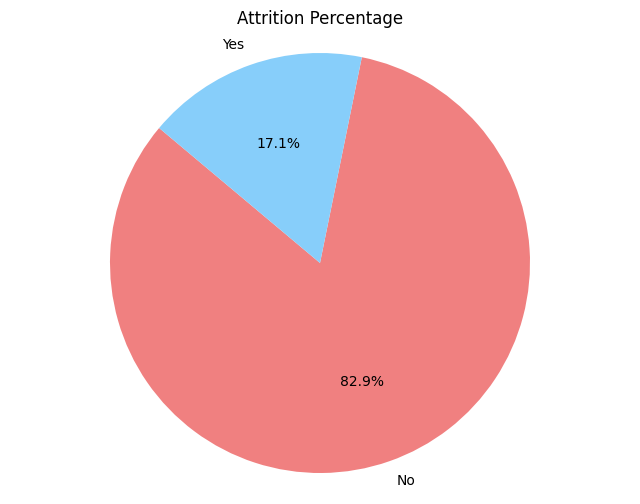

In [ ]:
# Menampilkan visualisasi presentase Atrisi menggunakan pie chart
# Data untuk pie chart
labels = count_by_attrition.index
sizes = count_by_attrition["Percentage"]
colors = ['lightcoral', 'lightskyblue']

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Attrition Percentage')
plt.axis('equal')  # Pastikan lingkaran terlihat sebagai lingkaran
plt.show()


2. Bagaimana korelasi antar kolom `"Attrition", "Age", "Education", "Environment Satisfaction", "Job Involvement", "Job Level", "Job Satisfaction", "Monthly Income", "Salary Slab", "Over Time", "Performance Rating", "Relationship Satisfaction", "Training Times Last Year", "Work Life Balance", "Years At Company", "Years Since Last Promotion", "Num Attrition"`

In [ ]:
# Menampilkan nilai korelasi antar beberapa kolom
# Kolom yang akan digunakan dalam perhitungan korelasi
column_corr = ["Attrition", "Age", "Education", "Environment Satisfaction", "Job Involvement",
               "Job Level", "Job Satisfaction", "Monthly Income", "Salary Slab",
               "Over Time", "Performance Rating", "Relationship Satisfaction",
               "Training Times Last Year", "Work Life Balance", "Years At Company",
               "Years Since Last Promotion", "Num Attrition"]

# Menghitung matriks korelasi dengan metode Spearman
correlation_spearman = data_hr_clean[column_corr].corr(method='spearman')
correlation_spearman

<ipython-input-33-8b5b8e1ff924>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_spearman = data_hr_clean[column_corr].corr(method='spearman')


,Age,Education,Environment Satisfaction,Job Involvement,Job Level,Job Satisfaction,Monthly Income,Performance Rating,Relationship Satisfaction,Training Times Last Year,Work Life Balance,Years At Company,Years Since Last Promotion,Num Attrition
Age,1.000000,0.226921,0.011501,0.057217,0.423234,0.012050,0.408585,-0.001223,0.032199,-0.003756,-0.005615,0.126297,0.075422,-0.174968
Education,0.226921,1.000000,-0.025087,0.043781,0.109795,0.006559,0.125952,-0.023408,-0.007876,-0.019905,0.017173,0.040238,0.023060,-0.035459
Environment Satisfaction,0.011501,-0.025087,1.000000,-0.006910,0.021455,-0.005982,-0.002541,-0.035959,0.015210,-0.014369,0.021679,0.022295,0.045056,-0.097922
Job Involvement,0.057217,0.043781,-0.006910,1.000000,0.014124,0.009349,0.002048,-0.016413,0.023300,0.005569,-0.005796,0.053567,0.025858,-0.124712
Job Level,0.423234,0.109795,0.021455,0.014124,1.000000,0.004577,0.900535,-0.022719,-0.008148,-0.025682,0.049488,0.343888,0.138571,-0.197103
Job Satisfaction,0.012050,0.006559,-0.005982,0.009349,0.004577,1.000000,0.007235,0.003749,-0.008312,-0.022155,-0.024285,0.025786,0.008085,-0.118801
Monthly Income,0.408585,0.125952,-0.002541,0.002048,0.900535,0.007235,1.000000,-0.035034,-0.018811,-0.042505,0.035287,0.349990,0.138823,-0.205885
Performance Rating,-0.001223,-0.023408,-0.035959,-0.016413,-0.022719,0.003749,-0.035034,1.000000,-0.022553,-0.005524,0.004576,0.028061,-0.014248,0.010466
Relationship Satisfaction,0.032199,-0.007876,0.015210,0.023300,-0.008148,-0.008312,-0.018811,-0.022553,1.000000,0.007144,0.015595,-0.027035,0.016492,-0.051039
Training Times Last Year,-0.003756,-0.019905,-0.014369,0.005569,-0.025682,-0.022155,-0.042505,-0.005524,0.007144,1.000000,0.034251,-0.005808,0.018626,-0.044940


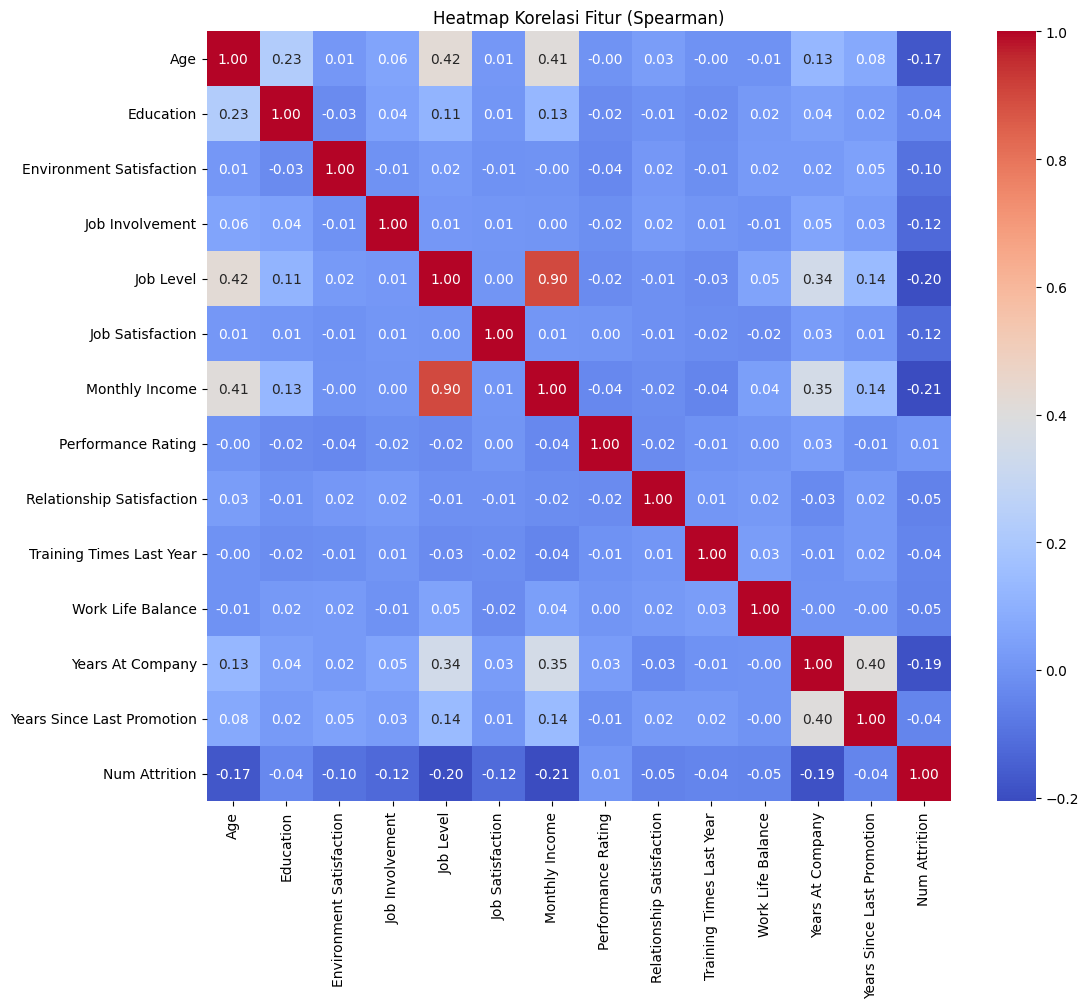

In [ ]:
# Membuat visualisasi nilai korelasi menggunakan heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Heatmap Korelasi Fitur (Spearman)')
plt.show()

Penjelasan Korelasi

Nilai korelasi
*   0.00 - 0.19: Korelasi sangat lemah
*   0.20 - 0.39: Korelasi lemah
*   0.40 - 0.59: Korelasi sedang
*   0.60 - 0.79: Korelasi kuat
*   0.80 - 1.00: Korelasi sangat kuat




3. Bagaimana presentase Atrisi berdasarkan departemen?

In [ ]:
# Menghitung Atrisi berdasarkan departemen
# Menghitung jumlah karyawan berdasarkan kategori "Department" dan "Attrition"
count_by_department = data_hr_clean.groupby(["Department","Attrition"]).agg({"Employee ID": "count"})

# Menghitung total karyawan
total_employees = data_hr_clean["Employee ID"].count()

# Menghitung presentase
count_by_department["Percentage"] = ((count_by_department["Employee ID"] / total_employees) * 100).round(2)

# Menampilkan hasil
print(f"Perbandingan presentase karyawan yang melakukan atrisi dan tidak setelah data dibersihkan")
count_by_department

Perbandingan presentase karyawan yang melakukan atrisi dan tidak setelah data dibersihkan


Employee ID  Percentage
Department             Attrition                         
Human Resources        No                  45        3.48
                       Yes                 11        0.85
Research & Development No                 722       55.80
                       Yes                127        9.81
Sales                  No                 306       23.65
                       Yes                 83        6.41

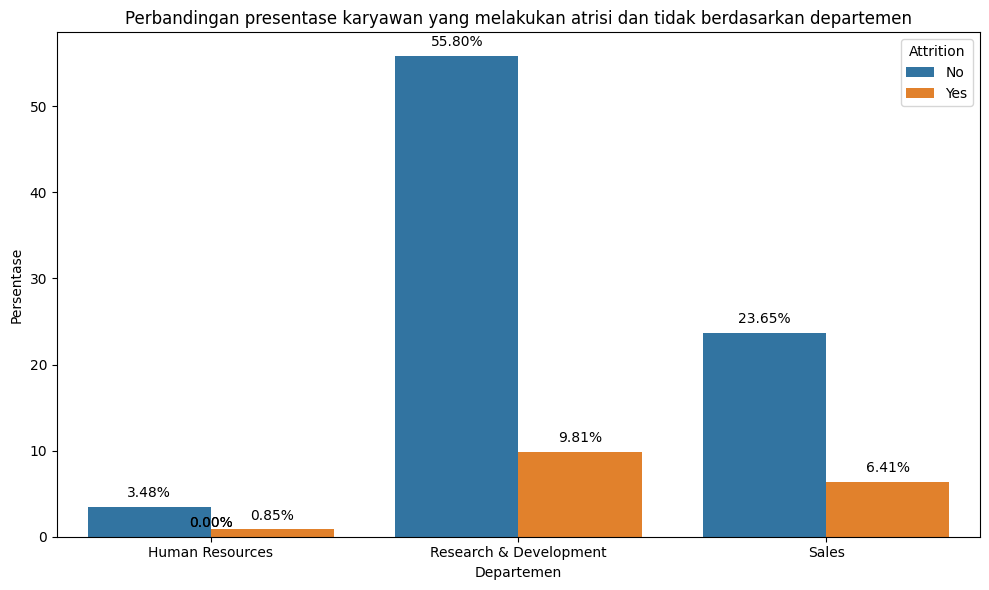

In [ ]:
# Membuat barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=count_by_department.index.get_level_values(0), y="Percentage", hue=count_by_department.index.get_level_values(1), data=count_by_department.reset_index())
plt.title("Perbandingan presentase karyawan yang melakukan atrisi dan tidak berdasarkan departemen")
plt.xlabel("Departemen")
plt.ylabel("Persentase")
plt.legend(title="Attrition")
plt.xticks(rotation=0)

# Menambahkan label persentase
for p in ax.patches:
    height = p.get_height() if not pd.isnull(p.get_height()) else 0
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

Berdasarkan visualisasi diatas, presentase karyawan yang melakukan atrisi terbanyak terjadi pada departemen Research & Development sebesar 9.81%.